# ■ 신경망 학습 (직접 신경망의 가중치와 바이어스를 생성)

** 신경망을 학습 시키기 위해서 알아야 하는 4장의 내용

    1. 오차함수 : 신경망이 뭘 잘못하고 있는지 깨닫게 해주는 함수
    2. 미니배치 : 학습할때 데이터를 한꺼번에 신경망에 넣는게 아니라 몇백장씩 조금씩 
                  신경망에 넣고 학습시키는 것
    3. 수치미분 : 오차함수의 기울기를 구해서 기울기만큼 가중치를 갱신해주는 역할을 할때 필요한 기능

# ■ 오차함수 

 - 예상값과 실제값과의 오차를 신경망에 역전파 시켜주기 위해서 필요한 함수
 - 신경망의 잘못을 깨닫게 해주는 함수


# ■ 오차제곱합(sum of squares for error, SEE)

$$ E = \frac{1}{2} \sum_k(y_k - t_k)^2 $$

y_k  : 예측값, t_k  : 실제값

In [7]:
import numpy as np

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

def mean_squared_error(y, t):
    return 0.5 * np.sum( (y - t)**2 )

print(mean_squared_error(np.array(y), np.array(t)))

0.09750000000000003


## 문제69. 숫자 7로 예측한 결과와 정답 숫자 2와의 오차를 구하시오 !

In [2]:
import numpy as np

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]  # 예측숫자 7
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]   # 정답숫자 2

def mean_squared_error(y, t):
    return 0.5 * np.sum( (y - t)**2 )

print(mean_squared_error(np.array(y), np.array(t)))  

0.5975


설명: 위의 오차 0.59는 오차가 작습니다. 분류문제를 해결하기 위해서는 더 큰 오차로 응답해줘야 합니다.  
그래서 필요한 함수가 바로 교차 엔트로피 함수 입니다.

# ■ 교차 엔트로피 함수(cross entropy error, CEE)

$$E = - \sum_kt_k\log{y_k}$$

In [6]:
import numpy as np

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]  # 예측숫자 7
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]   # 정답숫자 2

def cross_entropy_error(y, t):
    return - np.sum(t * np.log(y))

print(cross_entropy_error(y, t))

nan


<ipython-input-6-d6c3a697f3ba>:7: RuntimeWarning: divide by zero encountered in log
  return - np.sum(t * np.log(y))
<ipython-input-6-d6c3a697f3ba>:7: RuntimeWarning: invalid value encountered in multiply
  return - np.sum(t * np.log(y))


설명: 결과가 왜 nan 이 나왔냐면 log 함수에 숫자 0 이 들어갔기 때문입니다.  
log 에 숫자 0 이 들어가게 되면 마이너스 무한대가 됩니다.

<div>
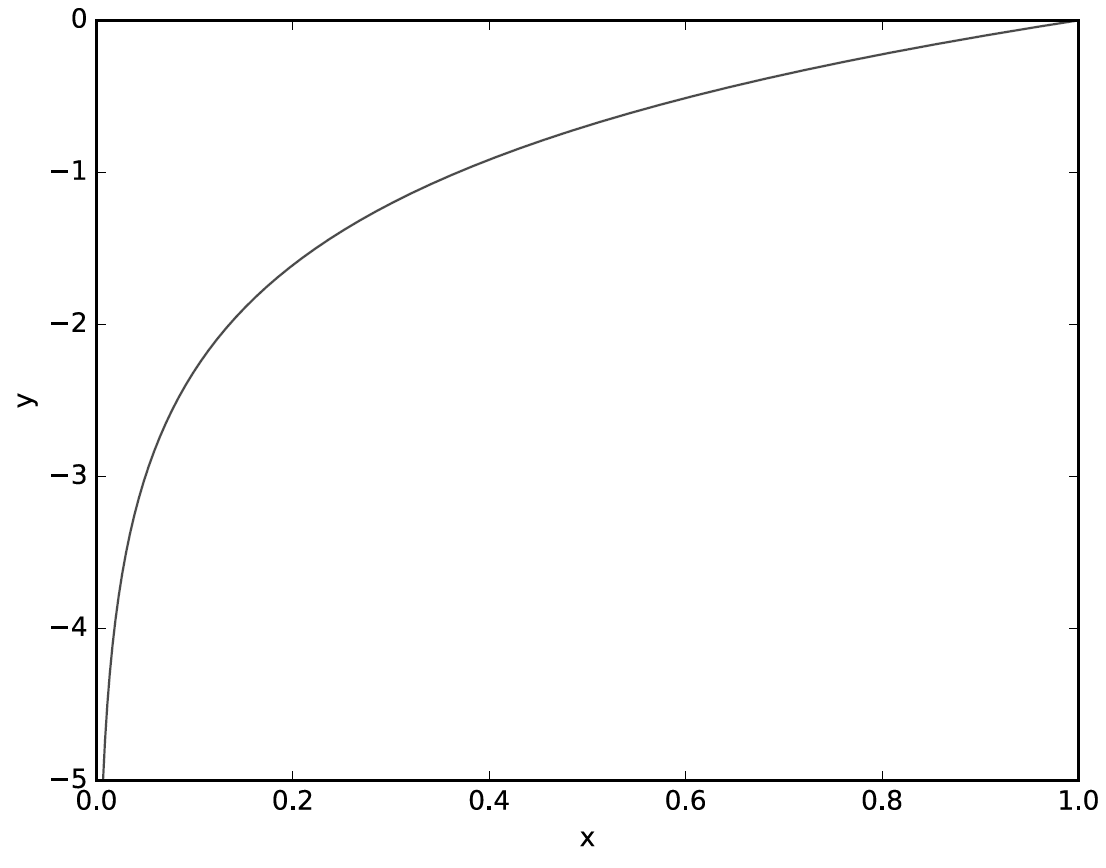
</div>

In [7]:
import numpy as np

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]  # 예측숫자 7
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]   # 정답숫자 2

def cross_entropy_error(y, t):
    delta = 1e-7  # 0.0000001 마이너스 무한대가 되지 않게 아주 작은 값을 더한다.
    return - np.sum(t * np.log(y + delta))

print(cross_entropy_error(np.array(y), np.array(t)))

2.302584092994546


설명: 평균제곱 오차함수는 오차가 0.59 인데 교차엔트로피 함수는 오차가 2.3 으로 훨씬 큰 오차를 출력합니다.  
분류문제를 풀 때는 교차 엔트로피 오차 함수를 사용해야합니다. 

# ■ 미니배치 학습

  " 훈련 데이터 중에 일부만 골라서 학습하는 방법 "

  " 표본을 뽑아서 학습 시킨다 "


    6만장  ---------------------------------------------------------->  신경망 (컴퓨터가 터져버린다.)

    6만장중에 1장씩 입력  ----------------------------------------> 신경망(시간이 많이 걸림)
    6만장중에 100장씩 입력  --------------------------------------> 신경망(학습시간을 빠르게 하기 위해서)

    (100, 784) ⊙ (784, 50) =>  (100, 50) ⊙ (50, 100) => (100, 100) ⊙ (100, 10) 

    => (100, 10)

100장을 추출할때 복원추출, 비복원추출 할 것인가는 크게 중요하지 않고 결국 여러 번 반복해서 학습하다보면 학습이 된다.

100장씩 600번을 훈련시키면 그게 1 epoch 이다.

60000장: 100장 x 600번 

## 문제70. 숫자 0 ~ 60000 의 숫자중에서 무작위로 10개를 출력하시오 !

In [5]:
import numpy as np
print( np.random.choice( np.arange(0, 60001), 10) ) 

[41787 27565 14373 52675 36576 17907 11626 10295 17653 28984]


## 문제71. 숫자 0 ~ 60000 의 숫자중에서 100 개를 랜덤 추출하시오 !

In [1]:
import numpy as np
print( np.random.choice( np.arange(0, 60001), 100) )

[45322 55640 31854 14802 50827 16809  9100 30237 16624 43440 58859  1008
  8333 17276 18431 56119 54896 20928 36699 17157 47154 46858 34596 44344
 24409 56678 12270 59731  9793 38545 52252 35224 53753 53375 33252 27612
 48156 58649 57709 44016  7286  8431 39795 15948  5929 59328 25834 15305
 28823  2885  8357 50645 33489 49329 41502 55020  3064   630 11616 30377
 49221 10660 39847 36200 26867  1527 33973 11534 52936 15034 44531  4971
   128 18455 27630 33447 19467 26523 25937 25941 16616 34069 34455 53763
 33685 27074   608 36738 37413 56334    62 38393 43047 15971 24599 48011
  8051 29851 31659 44770]


## 문제72. 3장에서 마지막으로 작성한 필기체 숫자를 예측하는 전체 코드를 가져와서 100개를 랜덤 추출하여 예측하게 할 수 있도록 코드를 수정하시오 !

In [1]:
# 클래스로 생성
class Three_nn():
    import numpy as np
    
    def init_network(self):
        import pickle
        with open('c:\\data\\sample_weight.pkl', 'rb') as f:
            network = pickle.load(f)
        return network

    # 1. 데이터를 불러옵니다. (얀르쿤 교수님이 만든 필기체 데이터)
    def get_data(self):
        from dataset.mnist import load_mnist
        (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, 
                                                        one_hot_label=False)
        return x_train, t_train

    # 2. 가중치와 바이어스 값을 불러와서 3층 신경망에 흘려보내는 함수
    def predict(self, network, x):
        #network = init_network()
        w1, w2, w3 = network['W1'], network['W2'], network['W3']
        b1, b2, b3 = network['b1'], network['b2'], network['b3']

        # 신경망을 구성합니다.
        # 0층
        #x = x_train[0:100]   # 일단 100개의 필기체 데이터를 구성합니다.

        # 1층
        y = np.dot(x,w1) + b1
        y_hat = sigmoid(y)

        # 2층
        z = np.dot(y_hat, w2) + b2
        z_hat = sigmoid(z)

        # 3층
        k = np.dot(z_hat, w3) + b3
        k_hat = softmax(k)
        return k_hat

In [2]:
from common.functions import *
n1 = Three_nn()

x, t = n1.get_data()     # 훈련 데이터와 훈련 데이터의 정답을 불러오는 코드
network = n1.init_network()    # 저자가 만들어온 가중치와 바이어스를 불러오는 코드

a = []
batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):   # 0, 100, 200, 300, 400, ...
    batch_mask = np.random.choice(60000, 100)  # 100개씩 복원추출
    y = n1.predict(network, x[batch_mask])  # x[0:100], x[100:200], ...
    y_hat = np.argmax(y, axis=1)   # 100개의 예측 숫자들이 출력됨
    a.append( sum(y_hat == t[batch_mask])/100 )  # 예측 100개와 정답 100개를 비교해서 정확도를 계산

print(len(a))   # 600개의 정확도가 들어있다.
print(np.mean(a)) 

600
0.9379333333333333


# ■ 수치미분

신경망을 학습 시킬때 왜 미분이 필요한가 ?

답: 가중치를 갱신해주기 위해서 미분이 필요합니다.

가중치 = 가중치 - 기울기

$$\frac{df(x)}{dx} = \lim_{h \to 0} \frac{f(x+h)-f(x)}{h}$$

In [50]:
def numerical_diff(f, x):
    h = 10e-50   # 0 에 가까워지는 숫자를 표현
    return (f(x+h) - f(x)) / h

def f(x):
    return 2*x**2 + 2

print(numerical_diff(f, 4))

0.0


진정한 미분은 컴퓨터로 구현할 수 없다.
컴퓨터로 구현하면 분모가 0 이 되어서 계산이 안된다.

$$ 도함수 공식 : \lim_{h \to 0} \frac{f(x+h)-f(x-h)}{(x+h)-(x-h)} = \lim_{h \to 0} \frac{f(x+h)-f(x-h)}{2h}$$

위의 식를 파이썬으로 구현하면?

In [49]:
def numerical_diff(f, x):
    h = 0.0001   # 극한값을 구현
    return ( f(x+h) - f(x-h) ) / (2*h)

def f(x):
    return 2*x**2 + 2

print(numerical_diff(f, 4))

15.999999999998238


## 문제73. 위에서 만든 미분함수를 이용해서 아래의 함수를 미분해서 기울기를 구하는데 x = 6 일때의 미분계수를 구하시오 !

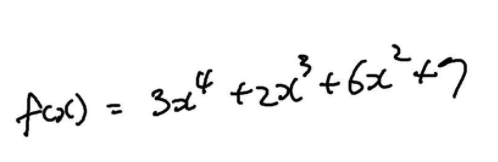

In [54]:
def numerical_diff(f, x):
    h = 0.0001   # 극한값을 구현
    return ( f(x+h) - f(x-h) ) / (2*h)

def f(x):
    return 3*x**4 + 2*x**3 + 6*x**2 + 7

print(numerical_diff(f, 6))

2880.0000007368
